# Bike Sharing Case Study
<font color='#1D8348'> **The case study is analyzing different factors demand for shared bikes and building a multiple linear regression model for the prediction of demand.** 

**Problem Statement**

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes ?
- How well those variables describe the bike demands ?

**Objective**

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding Data
Steps Involved:
- reading the data
- filtering data/columns if required
- checking for missing values and treatment if any
- checking overall summary statistics

In [1]:
# Importing required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
# Reading Data
bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the data shape
bike_sharing.shape

(730, 16)

In [4]:
# Checking the data for column types and missing values
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations
- Looking at the data shape and non null count of the dataframe we can see that there are no missing values and the data is complete.
- There are certain categorical variables that are numeric we need to convert those categories. We would be taking care of the same in due course.

#### Dropping Columns
We will be dropping the following columns:
- **instant** - This column is similar to the dataframe index so we do not need to keep it as it does not add any value to the overall analysis.
- **dteday** - This is the date column but, since we already have month and year which have been derived from the date column we can drop it for this analysis.
- **registered and casual** - From the data dictionary provided we can see that these 2 columns are basically being represented in the **cnt** column which is the target variable.

In [5]:
# Dropping irrelevant columns
bike_sharing = bike_sharing.drop(columns=['instant', 'dteday', 'registered', 'casual'],axis=1)
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [6]:
# Checking summary statistics
bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Observations:
- We can see that the median daily demand is **~4548** but would be interesting to see how the year wise break up looks like. While the minimum demand is 22 the maximum demand is almost double the average demand. 
- Almost 75% of the times the weather seems to be pleasant with temperature being less than **26 deg celsius**
- The difference between temperature and feeling temperature is **~2 - 4 deg celsius**

#### Chaging the column names and encoding the categorical columns
- We are renaming the columns like **mnth**, **Yr**, **temp**, **atemp**, **hum** etc. to a more meaningful names like **month**, **year**, **temperature** , **feeling temperature**, and **humidity** for better understanding.
- Also columns like **season**, **weekday**, **month** and **weathersit** are all saved as numeric. Changing them to relevant categories will help in better understanding of these columns while doing the analysis and also in the model buidling activity.

In [7]:
# changing column names for better understanding
bike_sharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'temp':'temperature', 
                             'atemp':'feeling_temperature'}, inplace=True)
# Encoding the variables 
bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing.month = bike_sharing.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 
                                             7:'july', 8:'aug', 9:'sep', 
                                   10:'oct',11:'nov', 12:'dec'})
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Bad_Weather',4:'Very_Bad_Weather'})

In [8]:
# Checking the outcome of column renaming and encoding
bike_sharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling_temperature,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Exploratory Data Analysis
Steps Involved:
- Univariate and Bi-Variate Analysis with data visualization

#### Creating custom functions:
With the idea to automate repetitve tasks certain custom functions have been created for proceesing the data into a certain format and generating charts used for visual analysis

In [9]:
# Function to create barplots and subplots 
def custombarplots(dataframe,x_var,y_var):
    """
    Creates a barplot and subplot for specified dataframe column and 'cnt' variable.

    Args:
        dataframe (pd.DataFrame): The input DataFrame containing the data.
        x_var (str): The column name for the x-axis variable.
        y_var (str): The column name for the y-axis variable.

    Returns:
        None (Displays the box plot)
    """
    plt.figure(figsize = (18,6))
    plt.subplot(1,2,1)
    ax = sns.barplot(x=x_var,y=y_var,data=dataframe,ci=None)
    plt.subplot(1,2,2)
    ax1 = sns.barplot(x=x_var,y=y_var,data=dataframe, hue='year',ci=None)
    plt.legend(labels=['2018', '2019'])
    plt.show()

In [10]:
# Creating a function to create boxplot and histogram
def custom_boxplot_distplot(dataframe,x_col):
    '''
    creates boxplot and a histogram 
    
    Parameters:
    - dataframe: pandas DataFrame
    - x_col: str, name of the column for x-axis
        
    Returns:
    plots the barplot and histogram
    subplots used plotting grpahs side by side
    
    summary added with percentiles at the bottom
    '''
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(dataframe[x_col],rug=True,color='royalblue')
    plt.subplot(1,2,2)
    sns.boxplot(data=dataframe,x=x_col)
    plt.suptitle(Title,fontsize=15)
    plt.show()
    print(dataframe[x_col].describe(percentiles=[0.05,0.10,0.25,0.50,.75,.80,.85,.90,.95,.99]))

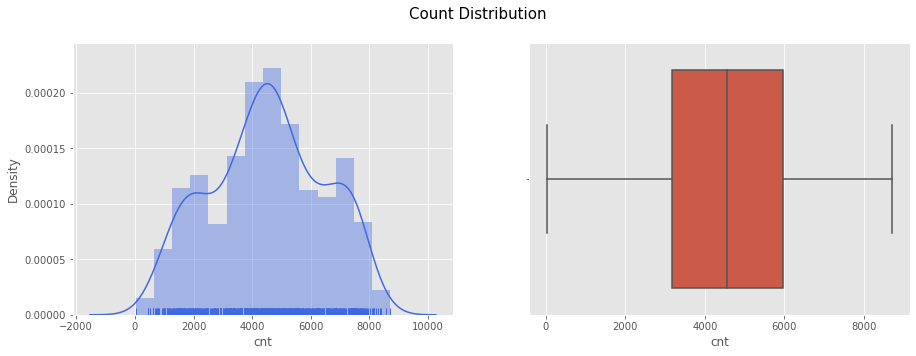

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
5%       1330.000000
10%      1742.600000
25%      3169.750000
50%      4548.500000
75%      5966.000000
80%      6393.200000
85%      6856.300000
90%      7293.800000
95%      7576.400000
99%      8163.810000
max      8714.000000
Name: cnt, dtype: float64


In [11]:
# cnt Amount Distribution
Title = 'Count Distribution'
custom_boxplot_distplot(bike_sharing,x_col='cnt')

- We can see that the median demand is **~4508**. While the minimum demand is 22 the maximum demand is almost double the average demand. 
- No outliers seen in the data

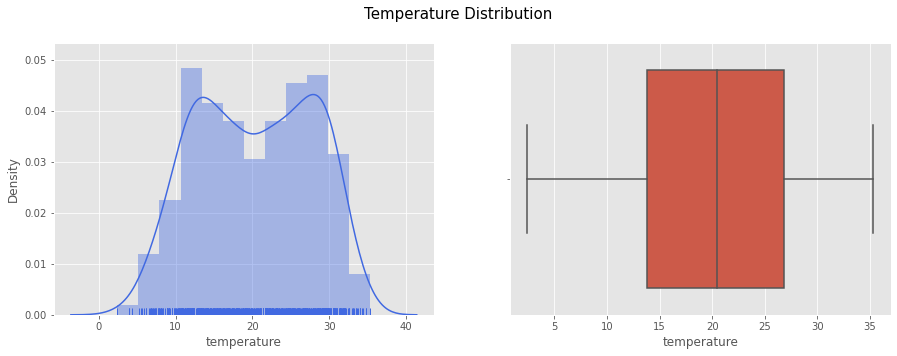

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
5%         8.747024
10%       10.653165
25%       13.811885
50%       20.465826
75%       26.880615
80%       28.125992
85%       29.144153
90%       29.998347
95%       31.520460
99%       33.868050
max       35.328347
Name: temperature, dtype: float64


In [12]:
# Loan Amount Distribution
Title = 'Temperature Distribution'
custom_boxplot_distplot(bike_sharing,x_col='temperature')

 - The distribution seems to be bi-modal with 2 peaks at ~13 deg celsius and ~29 deg celsius.
 - No outliers seen

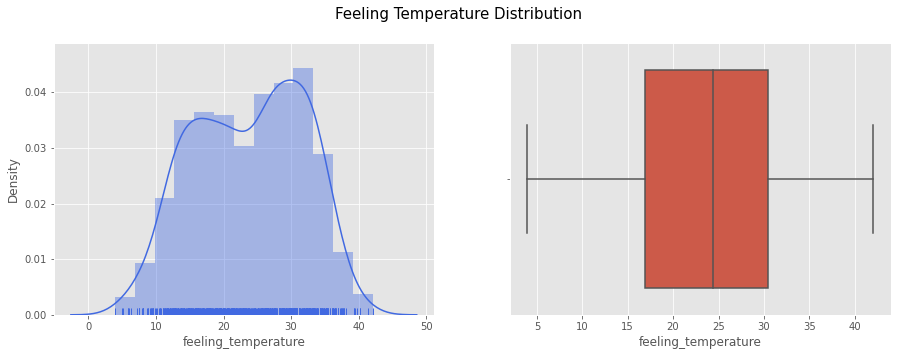

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
5%        11.030712
10%       12.752280
25%       16.889713
50%       24.368225
75%       30.445775
80%       31.881620
85%       32.734530
90%       33.908210
95%       35.749975
99%       38.941650
max       42.044800
Name: feeling_temperature, dtype: float64


In [13]:
# Loan Amount Distribution
Title = 'Feeling Temperature Distribution'
custom_boxplot_distplot(bike_sharing,x_col='feeling_temperature')

- Shift in feeling temperature to the right as compared to the temperature column is evident
- No outliers in the data

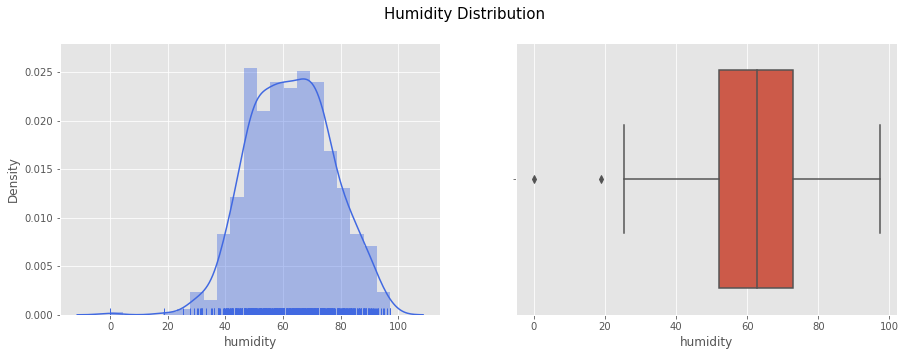

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
5%        40.741735
10%       45.000000
25%       52.000000
50%       62.625000
75%       72.989575
80%       75.291700
85%       77.568740
90%       81.762500
95%       86.868735
99%       92.795857
max       97.250000
Name: humidity, dtype: float64


In [14]:
# Loan Amount Distribution
Title = 'Humidity Distribution'
custom_boxplot_distplot(bike_sharing,x_col='humidity')

- Median humidity of **~62%**
- Couple of outliers at the lower end which is acceptable

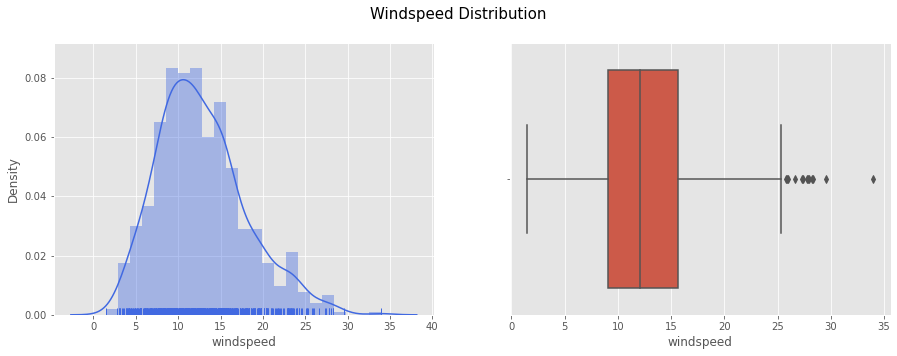

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
5%         5.326052
10%        6.704754
25%        9.041650
50%       12.125325
75%       15.625589
80%       16.639785
85%       18.128709
90%       19.833997
95%       22.999988
99%       27.380948
max       34.000021
Name: windspeed, dtype: float64


In [15]:
# Loan Amount Distribution
Title = 'Windspeed Distribution'
custom_boxplot_distplot(bike_sharing,x_col='windspeed')

- Median windspeed is ~12 
- Few outliers which should not be much of an issue

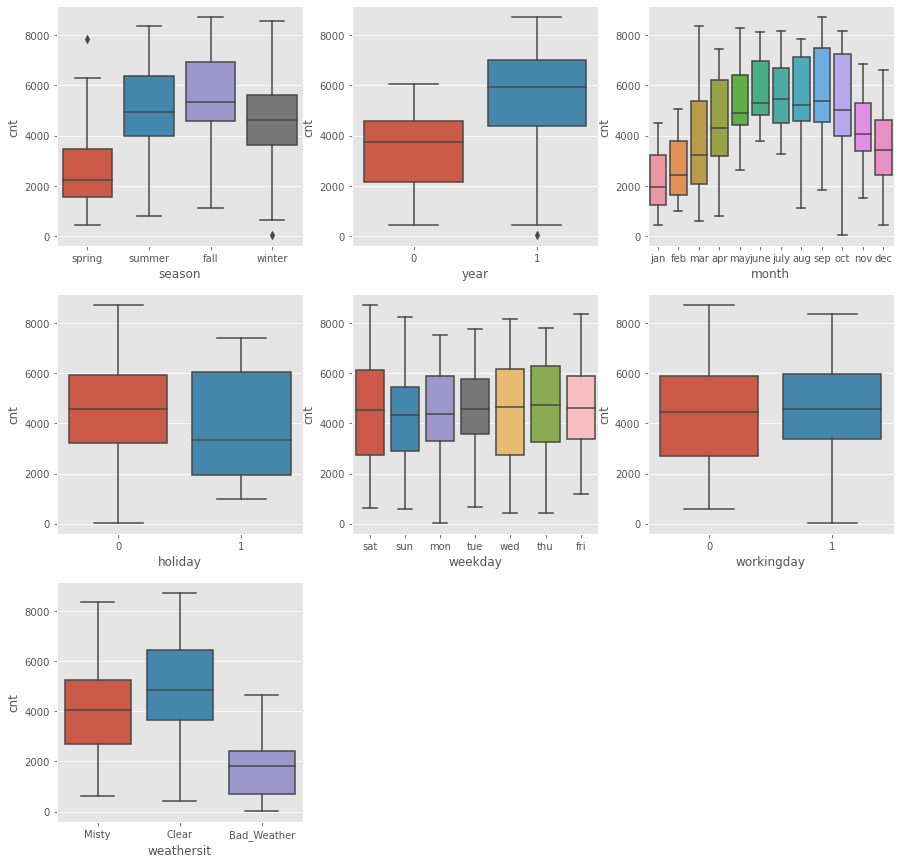

In [16]:
vars_cat = ['season','year','month','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing, x=i[1], y='cnt')
plt.show()

#### Observations
- **Fall** and **Summer** are the best seasons with **Spring** being the lowest in demand
- Demand picked up drastically in **2019**. Possible uptick as things improve in later years.
- Demand picks up as we move into the middle of the year with the peak in **September**. End of the year sees the demand fall.
- No such difference seen in demand during holiday versus when it is a normal day.
- Box plots don't show much difference in daily demand which is also evident from the working day plots.
- As expected **bad weather** impacts demand adversely.

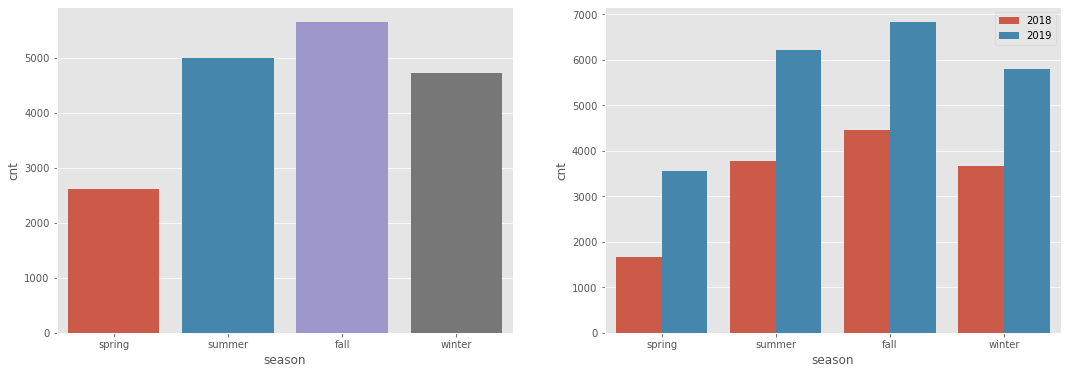

In [17]:
custombarplots(bike_sharing,x_var='season',y_var='cnt')

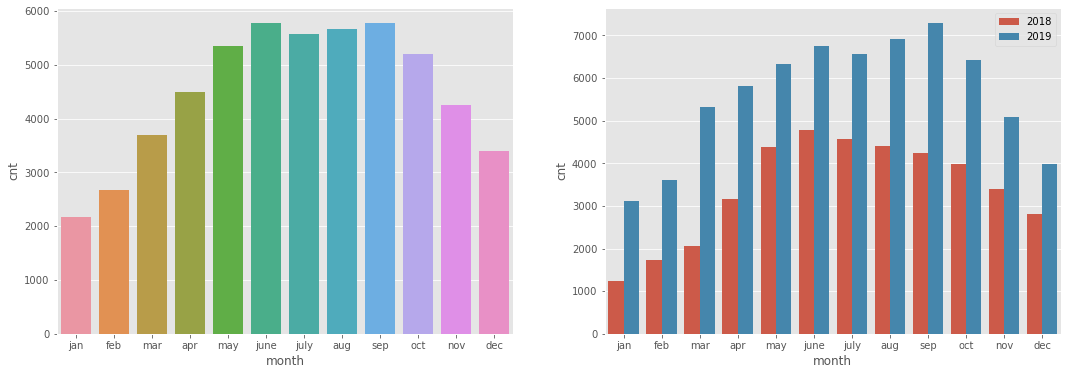

In [18]:
custombarplots(bike_sharing,x_var='month',y_var='cnt')

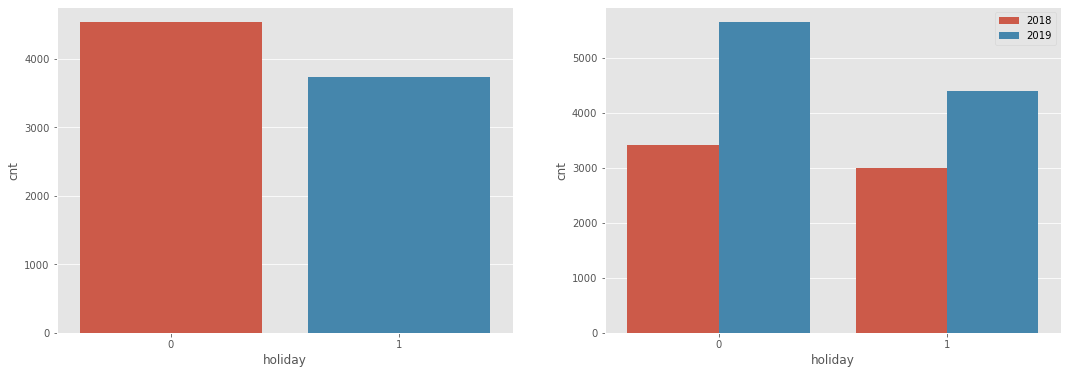

In [19]:
custombarplots(bike_sharing,x_var="holiday",y_var="cnt")

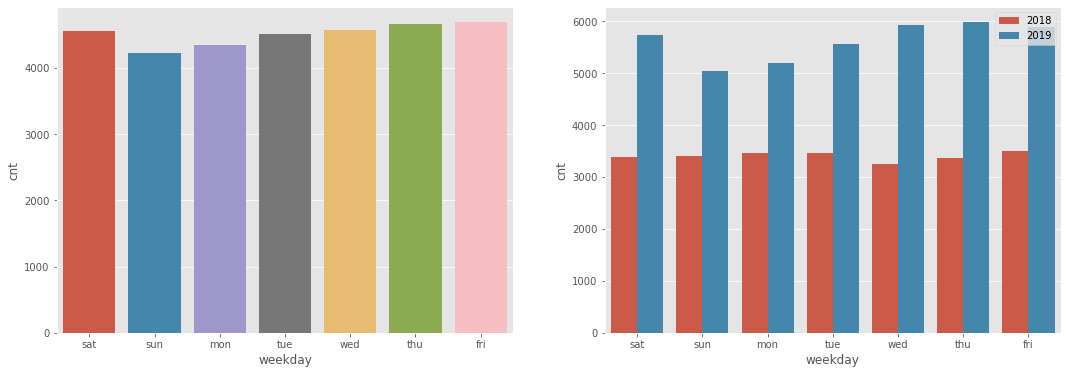

In [20]:
custombarplots(bike_sharing,x_var='weekday',y_var='cnt')

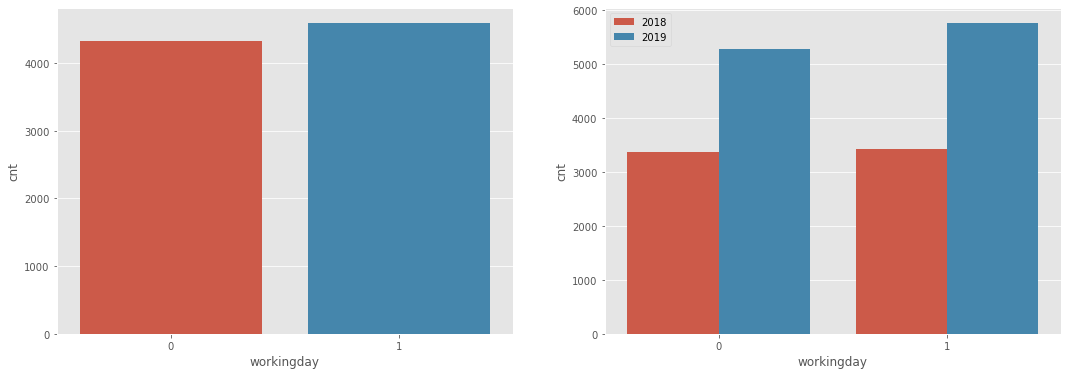

In [21]:
custombarplots(bike_sharing,x_var="workingday",y_var="cnt")

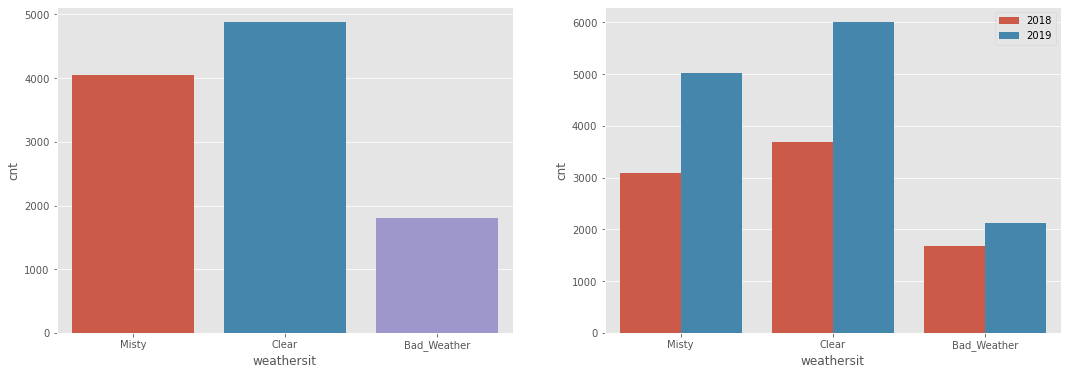

In [22]:
custombarplots(bike_sharing,x_var='weathersit',y_var='cnt')

#### Observations
- Most of the observations aligned with box plot summary.
- **2019** doing far better then 2018
- One trend more clear is that daily demand improves slightly as we move in to the week with a slight dip on Sunday.
- Demand picks up during working days. As things normalize may be people are using bikes to take bike rides for health reasons. Also bikes are being used for office commute for people going who are allowed into office.

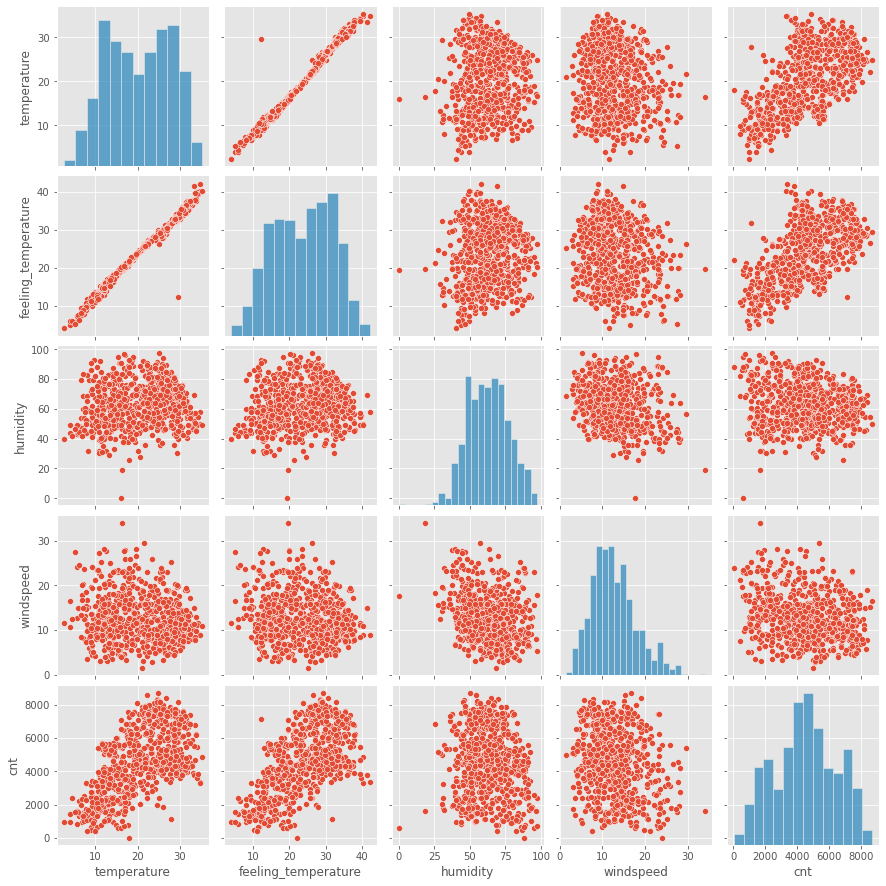

In [23]:
# Visualizing the numeric data
sns.pairplot(data=bike_sharing,vars=['temperature','feeling_temperature','humidity','windspeed','cnt'])
plt.show()

#### Observations:
- Evident linear relationship between temperature and count
- Some semblance of linear relationship between windspeed and humidity with count
- As is expected very strong linear relationship with temperature and feeling_temperature

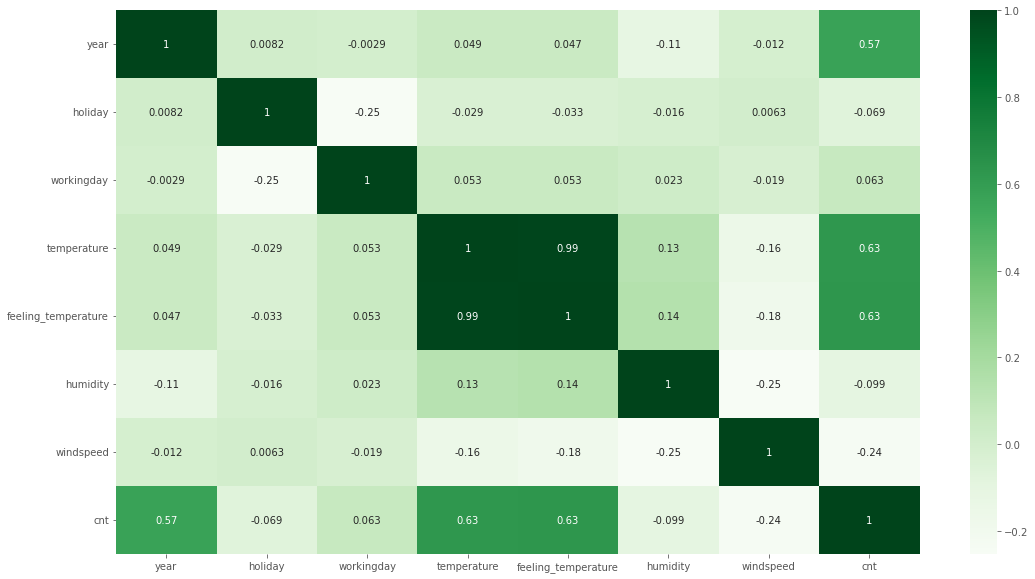

In [24]:
# Checking for correlation
bike_sharing_corr = bike_sharing.corr()
plt.figure(figsize=(18,10))
sns.heatmap(bike_sharing_corr, cmap = "Greens", annot=True)
plt.show()

### Observations:
- As observed in the scatter plot above the correlation heat map also shows that there exists very strong to moderate correlation between:
    - count and both temperature variables
    - multi-collinearirty between the 2 temperature variables
    - year and count also has good correlation

### Step 3: Data preparation for model building
Steps involved:
- Dummy Column creation
- Train test split
- Scaling 

In [25]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_sharing[['season','month','weekday','weathersit']]

In [26]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [27]:
# Adding the dummy variables to the original dataset
bike_sharing = pd.concat([dummy,bike_sharing],axis = 1)

In [28]:
# Dropping the variables not required
bike_sharing.drop(columns=['season', 'month', 'weekday', 'weathersit'],axis=1,inplace=True)

In [29]:
bike_sharing.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,weathersit_Clear,weathersit_Misty,year,holiday,workingday,temperature,feeling_temperature,humidity,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
# Checking the shape
bike_sharing.shape

(730, 30)

In [31]:
# Checking Columns of the new dataframe
bike_sharing.columns

Index(['season_spring', 'season_summer', 'season_winter', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_july', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear', 'weathersit_Misty',
       'year', 'holiday', 'workingday', 'temperature', 'feeling_temperature',
       'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [32]:
# creating train test split
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size = 0.7,  random_state = 100)

In [33]:
# checking train data shape
bike_sharing_train.shape

(510, 30)

In [34]:
# checking train test shape
bike_sharing_test.shape

(220, 30)

#### Scaling Approach
- We use **MinMax scaling** as it beings all the numerical data values between 0 and 1. As all our dummy and categorical variables are binary iwth 0 and 1 MinMax scaling will bring parity amongst all the variables   

In [35]:
# scaling the train data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temperature','feeling_temperature','humidity','windspeed','cnt']

bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

In [36]:
# checking scaled train data
bike_sharing_train.head()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,weathersit_Clear,weathersit_Misty,year,holiday,workingday,temperature,feeling_temperature,humidity,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [37]:
# desriptive stastics for the scaled train data
bike_sharing_train.describe()

,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,...,weathersit_Clear,weathersit_Misty,year,holiday,workingday,temperature,feeling_temperature,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.625490,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.484471,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


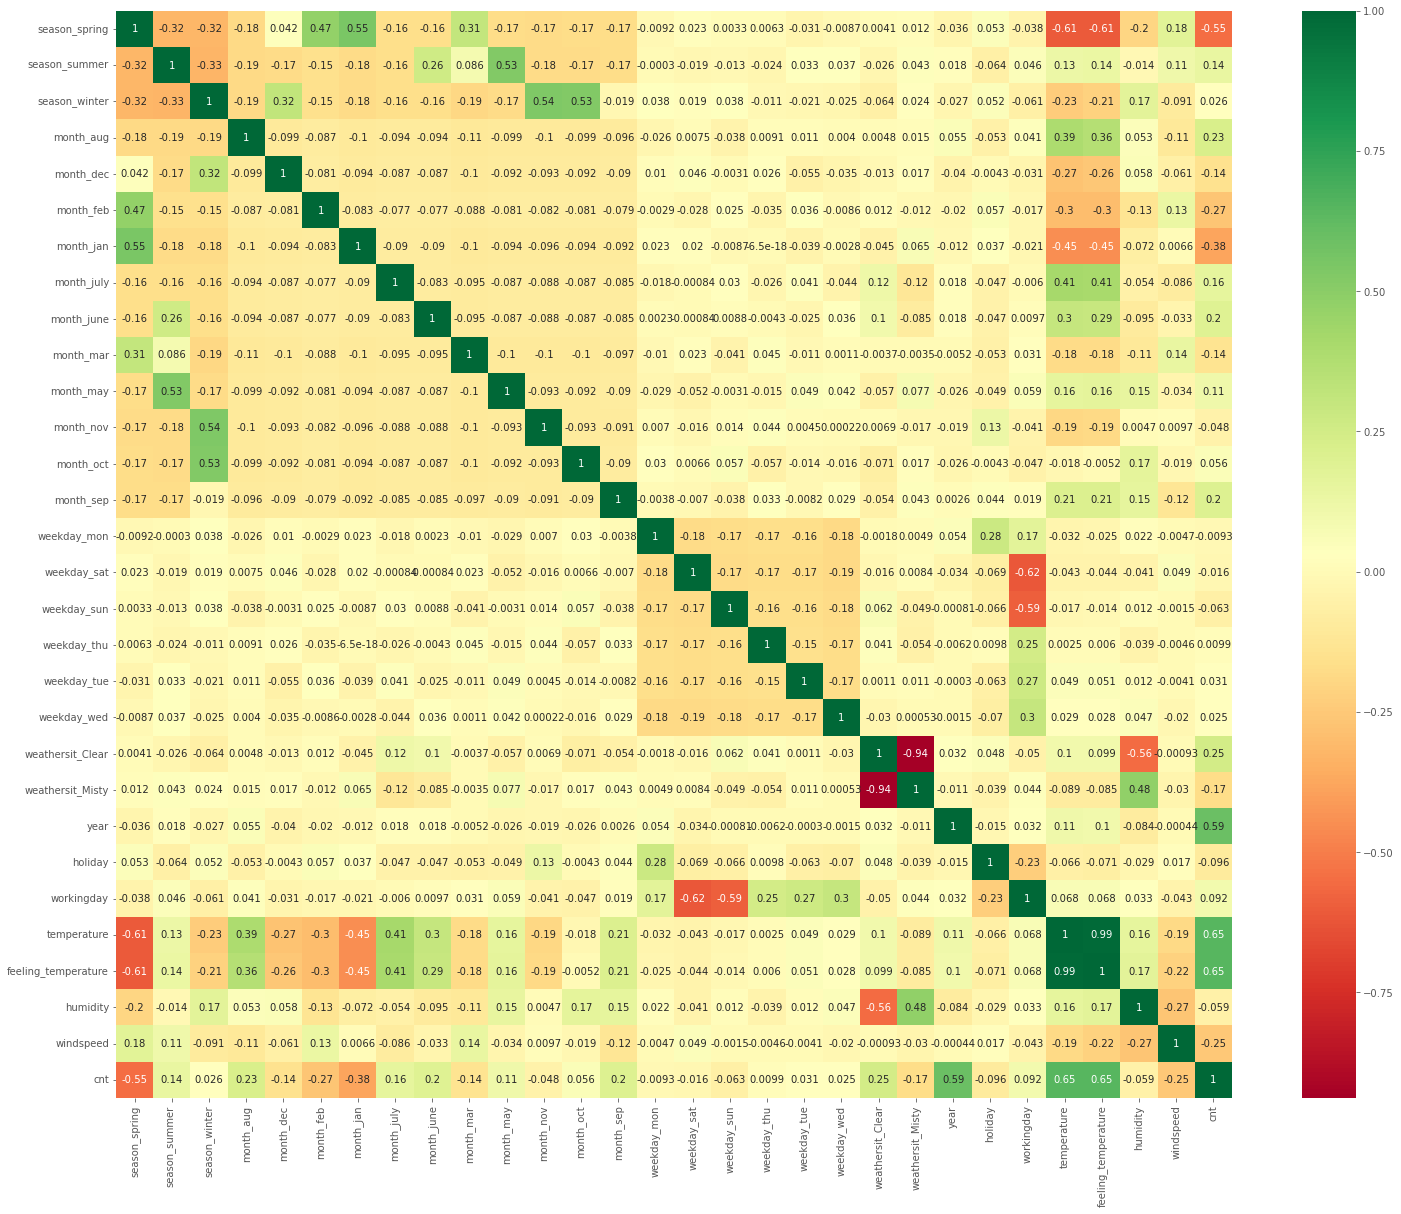

In [38]:
# checking the correlation matrix with all the new variables created
plt.figure(figsize = (25, 20))
sns.heatmap(bike_sharing_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Observations:
- correlation observed between some seasonal dummy variables and the respective months like:
    - Nov and Dec with Winter
    - May with summer
    - spring with Feb and Jan
- factors and weather conditions also show correlation like:
     - Humidity positive correlation with Misty Weather and negative correlation with Clear weather
     - Temeperature negatively correlated with Spring
     - Spring having some positive correlation with month of July
- workinday flag has negative correlation with Sat and Sun     

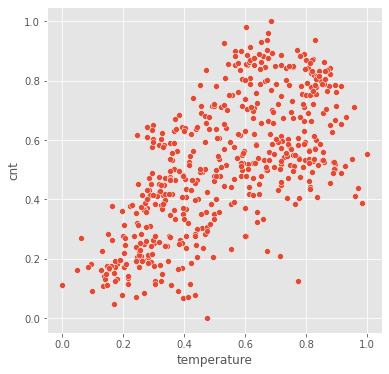

In [39]:
# checking the relationship between temperature and count variables
plt.figure(figsize=[6,6])
sns.scatterplot(bike_sharing_train.temperature, bike_sharing_train.cnt)
plt.show()

In [40]:
# dividing into x_train and y_train
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

## Step 4: Model Building
Steps Involved
- Automatic Variable Selection  using **RFE**
- Creating initial model using RFE selected variables
- Checking important model performance parameters like:
    - r2
    - variable significance using p-value
    - co-effecient polarity - evaluate if the polarity is logical with observations in the data and the interpretation of it's impact
    - VIF - to check and action multi-collinearity amongst predictors
- Iterating through different model constructs by changing predictor combinations    

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
# checking list of variables as per RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 13),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_Misty', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('feeling_temperature', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [44]:
# Importing packages for model building
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# function to build a model using statsmodel api
def model_build(cols):
    """
    creates a mulitple linear regression model using statsmodel package.

    Args:
        cols: columns of the X_train dataframe selected to build the model
        
    Returns:
        lm model instance
    """
    X_train_lm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_lm).fit()
    print(lm.summary())
    return lm

In [46]:
# function to create VIF scores
def vif_score(cols):
    """
    creates a dataframe with variables and VIF score in descending order.

    Args:
        cols: columns of the X_train dataframe selected to build the model
        
    Returns:
        VIF dataframe
    """
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by = "VIF", ascending = False))

In [47]:
# Creating list of variables identified through RFE for training the MLR model
col = X_train.columns[rfe.support_]
col

Index(['season_spring', 'season_summer', 'season_winter', 'month_jan',
       'month_july', 'month_sep', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Misty', 'year', 'holiday', 'workingday', 'temperature',
       'humidity', 'windspeed'],
      dtype='object')

In [48]:
# List of variables excluded after RFE
X_train.columns[~rfe.support_]

Index(['month_aug', 'month_dec', 'month_feb', 'month_june', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'feeling_temperature'],
      dtype='object')

### Model 1 :- 
#### Using RFE selected variables 

In [49]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

In [50]:
cols = list(X_train_rfe.columns)
print(cols)

['season_spring', 'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Clear', 'weathersit_Misty', 'year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed']


In [51]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.22e-191
Time:                        22:17:48   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0044      0.048  

### Model 2 :- 
#### Dropping *humidity* as it has high VIF

In [52]:
X_train_lm = X_train_rfe.drop(["humidity"], axis = 1)
cols = list(X_train_lm.columns)
print(cols)

['season_spring', 'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Clear', 'weathersit_Misty', 'year', 'holiday', 'workingday', 'temperature', 'windspeed']


In [53]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.60e-188
Time:                        22:17:49   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1171      0.039  

### Model 3 :- 
#### dropping *weathersit_Clear* as it has high VIF

In [54]:
X_train_lm_1 = X_train_lm.drop(["weathersit_Clear"], axis = 1)
cols = list(X_train_lm_1.columns)
print(cols)

['season_spring', 'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Misty', 'year', 'holiday', 'workingday', 'temperature', 'windspeed']


In [55]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.07e-162
Time:                        22:17:49   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1652      0.036  

### Model 4 :- 
#### dropping *month_jan* as it comes out to be insignificant

In [56]:
X_train_lm_2 = X_train_lm_1.drop(["month_jan"], axis = 1)
cols = list(X_train_lm_2.columns)
print(cols)

['season_spring', 'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Misty', 'year', 'holiday', 'workingday', 'temperature', 'windspeed']


In [57]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.82e-163
Time:                        22:17:49   Log-Likelihood:                 444.35
No. Observations:                 510   AIC:                            -862.7
Df Residuals:                     497   BIC:                            -807.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1512      0.035  

### Model 5 :- 
#### dropping *holiday* as it comes out to be insignificant 

In [58]:
X_train_lm_3 = X_train_lm_2.drop(["holiday"], axis = 1)
cols = list(X_train_lm_3.columns)
print(cols)

['season_spring', 'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Misty', 'year', 'workingday', 'temperature', 'windspeed']


In [59]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.73e-163
Time:                        22:17:49   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1440      0.035  

### Model 6 :-
#### We have observed that *temperature* has high VIF. But since *temperature* is an important factor having a strong linear relationship with *count* dropping it might make the model weak. 
#### We have checked that *spring* and *july* month have some correlation with *temperature* hence we will check model performance by dropping these variables one by one
#### dropping *spring* variable first 

In [60]:
X_train_lm_4 = X_train_lm_3.drop(["season_spring"], axis = 1)
cols = list(X_train_lm_4.columns)
print(cols)

['season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat', 'weathersit_Misty', 'year', 'workingday', 'temperature', 'windspeed']


In [61]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.77e-163
Time:                        22:17:49   Log-Likelihood:                 439.87
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     499   BIC:                            -811.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0748      0.021  

## Model 7
#### dropping *july* month variable

In [62]:
X_train_lm_5 = X_train_lm_4.drop(["month_july"], axis = 1)
cols = list(X_train_lm_5.columns)
print(cols)

['season_summer', 'season_winter', 'month_sep', 'weekday_sat', 'weathersit_Misty', 'year', 'workingday', 'temperature', 'windspeed']


In [63]:
model_build(cols)
vif_score(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.38e-163
Time:                        22:17:49   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0786      0.021  

#### This model construct seems to be good as: 
- all the variables are statistically significant. 
- the coeffecient polarity and magnitude seem to be inline with business logic
- all the VIFs seems to be at acceptable levels

## Step 5: Model Evaluation and Prediction
Steps Involved:
- Making predictions on train data
- Residual Analysis
- Test data preparation (scaling)
- Making predictions on test data
- Checking model accuracy on test data

In [64]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [65]:
#Let us build the final model using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.07857655607334163 [ 0.08861738  0.11611155  0.08758123  0.05910751 -0.06633702  0.23881734
  0.04791204  0.5513895  -0.1838441 ]


In [66]:
y_train_pred = lr.predict(X_train[cols])

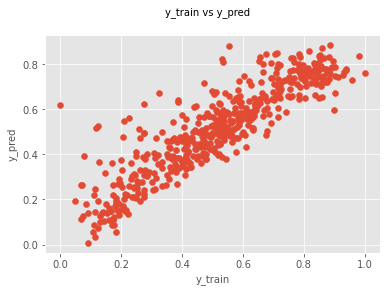

In [67]:
# plot scatter plot y_test vs y_pred
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 10) 
plt.xlabel('y_train', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)   
plt.show()

In [68]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

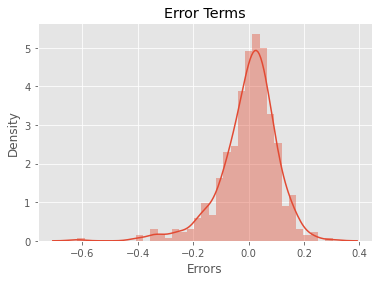

In [69]:
plot_res_dist(y_train, y_train_pred)

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with 
the stated assumptions of linear regression.

#### Cross-verifying the above conclusion using a qq-plot as well:

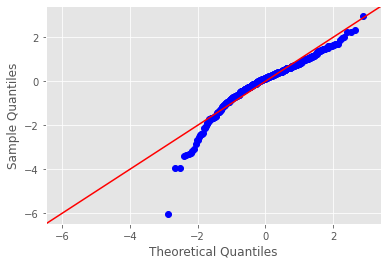

In [70]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed.

In [71]:
#Print R-squared Value
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_train,y_train_pred)

0.7907739790496814

 train r2 value with sk learn matching with r2 value from statsmodel

#### Predictions on test data

In [72]:
# Scaling the test data
bike_sharing_test[num_vars] = scaler.transform(bike_sharing_test[num_vars])

In [73]:
# creating X_test and y_test dataframes
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm_5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making the model predictions
y_test_pred = lr.predict(X_test[cols])

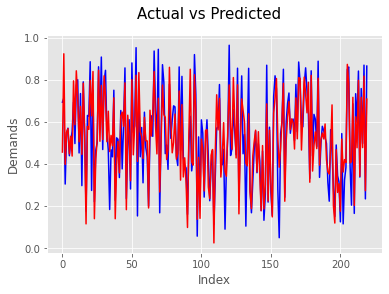

In [76]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [77]:
# checking r2 and adj r2 score for train and test
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train,y_train_pred)
adj_train_r2 = 1-(1-train_r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)
test_r2 = r2_score(y_test, y_test_pred)
adj_test_r2 = 1-(1-test_r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)

print('Train r2          :',train_r2)
print('Adjusted Train r2 :',adj_train_r2)
print('Test r2           :',test_r2)
print('Adjusted Test r2  :',adj_test_r2)

Train r2          : 0.7907739790496814
Adjusted Train r2 : 0.7781332402839329
Test r2           : 0.7692476895188506
Adjusted Test r2  : 0.7340276000243593


#### The train and test r2 scores are quite close to each other which means that model performs decently on unseen data.

In [78]:
# checking the mean squared error for both training and testing dataset.
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Test mean squared error:  ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train mean squared error:  0.010516948076222374
Test mean squared error:   0.011033255470338933


#### We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Final Equation

*cnt* = 0.5514 x *temp* + 0.2388 x *year* + 0.0479 x *workingday* + 0.0886 x *season_summer* + 0.1161 x *season_winter* + 
0.0876 x *month_sep* + 0.0591 x *weekday_sat* - 0.0663 x *weathersit_Misty* + -0.1838 x *windspeed*

## Conclusion:


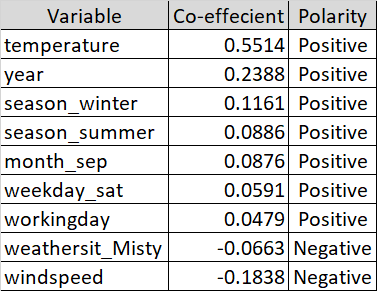

The above table shows the variable sorted by magnitude of the co-effecient. The polarity shows variables having positive impact on the demand and vice versa.

We can clearly see from the data that demand increases with:
 - increase in temperature
 - year progression
 - advent of summer and winter seasons
 - month of september (which is the peak of demand)
 - saturday and weekday flag - we have seen that demand increase as progress through the week and goes down on Sunday. Saturday sees highest demand
 - Misty Weather - demand will go down with adverse weather conditions

Thus the business can plan accordingly to drive demand since covid situation eases and things come back to normal:

 - Since fall, summer and winter see greater demand increase coverage with increasing number of bike pods and bike availability during that time. Improve spring demand by more promotions and marketing campaigns. Also actively track weather predictions and plan accordingly.
 
 - From the data we see that soike in YoY demand (~70%). Also Year is coming out to be one of most significant variable. Keeping this in mind the company should put in a place an effective framework for forecasting future demand specifically with the covid uncertainities in place and build on the current model developed. 
 

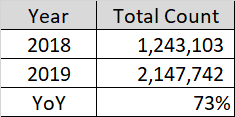

- Working day demand is steadily increasing which could see futher improvement if situation goes to normal. Keeping this in mind coverage can be improved in office areas and also around public trasnportation hubs like metro stations etc.  
  
- Holiday and Sunday discounts and increased availabiliy at leisure places, picnic spots, restaurants, markets could also be evaluated to drive demand during off days.